ระบบ Blockchain เป็นระบบความปลอดภัยของเครือข่ายเพื่อปกป้องข้อมูลจากการโจมตีของแฮกเกอร์ ระบบความปลอดภัยของ Blockchain จึงได้รับการออกแบบให้ตรวจสอบความถูกต้องของธุรกรรมอย่างเข้มงวด โดยจำนวนธุรกรรมที่ปลอดภัยสามารถคำนวณได้จากฟังก์ชัน S(t)

เพื่อรักษาความปลอดภัยและเสถียรภาพของระบบ นักพัฒนาจำเป็นต้องวิเคราะห์การเปลี่ยนแปลงของธุรกรรมที่ปลอดภัย โดยการศึกษาสมการเชิงอนุพันธ์ A

ทีมพัฒนา Blockchain กำลังพิสูจน์ว่า โมเดลที่ใช้สามารถคาดการณ์ความปลอดภัยได้จริง โดยจะต้องตรวจสอบว่าฟังก์ชัน S(t) เป็นผลเฉลยที่ถูกต้องของสมการเชิงอนุพันธ์

ตอบ 0

In [2]:
import sympy as sym

t = sym.symbols('t')
s = sym.exp(-3*t)
eq = sym.diff(s, t, 2) + 2 * sym.diff(s, t, 1) - 3 * s
print(sym.simplify(eq))

0


การกระจายข้อมูลในเครือข่ายคอมพิวเตอร์แบบกระจาย (Distributed Network) อาจได้รับผลกระทบจากปัจจัยการหน่วงเวลาและอัตราการสูญเสียข้อมูลระนะทาง ตามสมการ B โดยที่
x: เวลาในการส่งข้อมูล (วินาที)
y: จำนวนข้อมูลที่ยังคงอยู่ในเครือข่าย (หน่วย)
จงหาผลเฉลยทั่วไปของสมการเชิงอนุพันธ์ B และหากจำนวนข้อมูลเริ่มต้นที่ y(1)=2 ให้หาผลเฉลยเฉพาะเจาะจง

ตอบ
General Solution:
Eq(y(x), C1/x + x/2)
Particular Solution:
Eq(y(x), (x**2 + 3)/(2*x))

In [ ]:
x = sym.symbols('x')
y = sym.Function('y')
ode = sym.Eq(x * y(x).diff(x) + y(x), x)
general_solution = sym.dsolve(ode, y(x))
print(f"General Solution:\n{general_solution}")

boundary_condition = sym.Eq(general_solution.rhs.subs(x, 1), 2)
c1_val = sym.solve(boundary_condition, sym.symbols('C1'))[0]
particular_solution = sym.Eq(y(x), general_solution.rhs.subs(sym.symbols('C1'), c1_val))
print(f"Particular Solution:\n{particular_solution}")


General Solution:
Eq(y(x), C1/x + x/2)
Particular Solution:
Eq(y(x), x/2 + 3/(2*x))


จงพล็อตสนามทิศทางของการเคลื่อนที่ของลมตามสมการเชิงอนุพันธ์ C ในช่วง -4 <= x <= 4 และ -4 <= y <= 4 โดยมีเงื่อนไขเริ่มต้นที่ y(0)=1 โดยจะต้องได้ผลลัพธ์ดังรูปภาพ

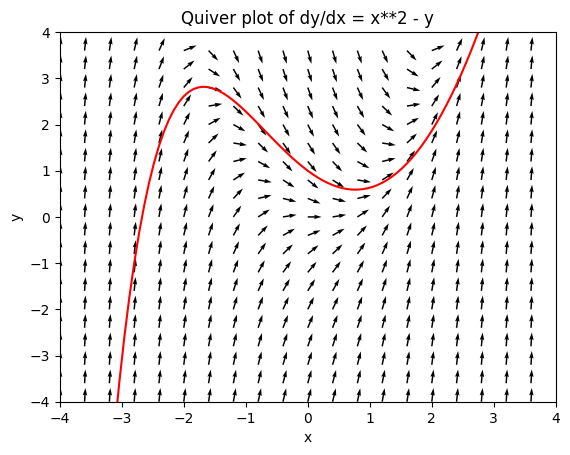

In [9]:
import numpy as np
import matplotlib.pyplot as plt

X, Y = np.meshgrid(np.arange(-4, 4, 0.4), np.arange(-4, 4, 0.4))

x = np.linspace(-4, 4, 101)
y = x**2 - 2*x + 2 - np.exp(-x)
plt.plot(x, y, 'r')

U = 1
V = X**2 - Y
vl = np.sqrt(U**2 + V**2)

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.title("Quiver plot of dy/dx = x**2 - y")

plt.quiver(X, Y, U/vl, V/vl)
plt.show()